In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column in ['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

nb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy NB: ", accuracy_score(y_test, y_pred))

Accuracy NB:  0.6664732566726448


In [3]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  background       0.66      0.98      0.79     10209
      banana       0.67      0.22      0.33     11876
        wine       0.67      0.80      0.73     15831

    accuracy                           0.67     37916
   macro avg       0.67      0.67      0.62     37916
weighted avg       0.67      0.67      0.62     37916



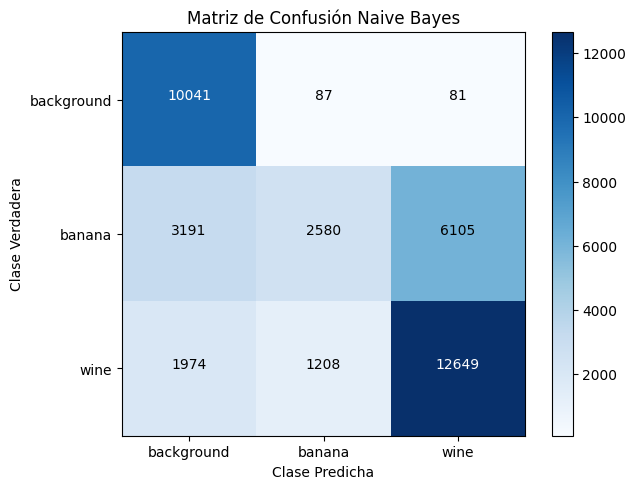

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de confusión
cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)


# Visualizar la matriz de confusión
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Naive Bayes')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_pred))
for i in range(3):
    for j in range(3):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > cnf_matrix.max() / 2. else "black")
plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()
